In [2]:
import pymssql
import pandas as pd

Read In Tables From Database

In [3]:
database = "group4"
mortalityTable = "dbo.mortality"
underweightTable = "dbo.underweight"
waterTable = "dbo.water"
malariaTable = "dbo.malaria"
tbTable = "dbo.tb"
user = "group4user"
password  = "everythingIsAwesome!"
server = "database2108.database.windows.net"

In [4]:
conn = pymssql.connect(server, user, password, database)

dfMortal = pd.read_sql(f"SELECT * FROM {mortalityTable}", conn)
dfUnder = pd.read_sql(f"SELECT * FROM {underweightTable}", conn)
dfWater = pd.read_sql(f"SELECT * FROM {waterTable}", conn)
dfMalaria = pd.read_sql(f"SELECT * FROM {malariaTable}", conn)
dfTb = pd.read_sql(f"SELECT * FROM {tbTable}", conn)

display(dfMortal)
display(dfUnder)
display(dfWater)
display(dfMalaria)
display(dfTb)

,Country,Year,PercentMortality
0,AFG,2000,31.6
1,AFG,2001,30.7
2,AFG,2002,29.2
3,AFG,2003,28.6
4,AFG,2004,28.2
...,...,...,...
3106,ZWE,2012,40.7
3107,ZWE,2013,38.3
3108,ZWE,2014,35.8
3109,ZWE,2015,34.6


,Country,PercentUnderweightAdults,Year
0,AFG,22.000000,2000
1,AFG,21.600000,2001
2,AFG,21.299999,2002
3,AFG,20.900000,2003
4,AFG,20.600000,2004
...,...,...,...
3293,ZWE,8.300000,2012
3294,ZWE,8.200000,2013
3295,ZWE,8.100000,2014
3296,ZWE,8.000000,2015


,Country,Year,PercentWater
0,AFG,2000,28.171419
1,AFG,2001,28.199369
2,AFG,2002,30.236380
3,AFG,2003,32.273720
4,AFG,2004,34.328560
...,...,...,...
4111,ZWE,2016,64.468964
4112,ZWE,2017,63.996620
4113,ZWE,2018,63.538769
4114,ZWE,2019,63.094959


,Country,Year,PercentMalaria
0,ABW,2000,0.0
1,ABW,2001,0.0
2,ABW,2002,0.0
3,ABW,2003,0.0
4,ABW,2004,0.0
...,...,...,...
4955,ZWE,2015,9.7
4956,ZWE,2016,6.8
4957,ZWE,2017,11.7
4958,ZWE,2018,5.5


,Country,Year,PercentTb
0,AFG,2000,0.190
1,AFG,2001,0.189
2,AFG,2002,0.189
3,AFG,2003,0.189
4,AFG,2004,0.189
...,...,...,...
3459,ZWE,2016,0.233
3460,ZWE,2017,0.221
3461,ZWE,2018,0.210
3462,ZWE,2019,0.199


Joined Tables To Create Features Table

In [6]:
joined = dfWater.merge(dfUnder, on = ["Country", "Year"]) \
                .merge(dfMortal, on = ["Country", "Year"]) \
                .merge(dfMalaria, on = ["Country", "Year"]) \
                .merge(dfTb, on = ["Country", "Year"])

display(joined)

,Country,Year,PercentWater,PercentUnderweightAdults,PercentMortality,PercentMalaria,PercentTb
0,AFG,2000,28.171419,22.000000,31.6,8.2,0.190
1,AFG,2001,28.199369,21.600000,30.7,7.9,0.189
2,AFG,2002,30.236380,21.299999,29.2,7.9,0.189
3,AFG,2003,32.273720,20.900000,28.6,6.8,0.189
4,AFG,2004,34.328560,20.600000,28.2,3.7,0.189
...,...,...,...,...,...,...,...
3083,ZWE,2012,66.491180,8.300000,40.7,5.7,0.355
3084,ZWE,2013,65.966469,8.200000,38.3,8.1,0.304
3085,ZWE,2014,65.454109,8.100000,35.8,10.1,0.278
3086,ZWE,2015,64.954933,8.000000,34.6,9.7,0.242


Create and Export Visualizations

In [22]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

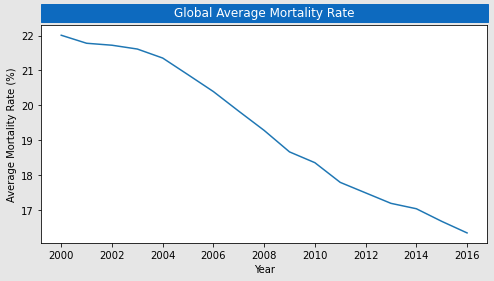

In [259]:
gblAvg = joined.groupby("Year").mean()

fig, ax = plt.subplots(1, 1)
fig.patch.set_facecolor("#E6E6E6")

plt.plot(gblAvg.index, gblAvg["PercentMortality"])
fig.set_figwidth(8)

title = ax.set_title("Global Average Mortality Rate", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
title._bbox_patch._mutation_aspect = 0.02
title.get_bbox_patch().set_boxstyle("square", pad = 11.1)
ax.set_xlabel("Year")
ax.set_ylabel("Average Mortality Rate (%)")

plt.show()
fig.savefig("../../Presentation Materials/global_average_mortality.svg")

<class 'matplotlib.axes._subplots.AxesSubplot'>


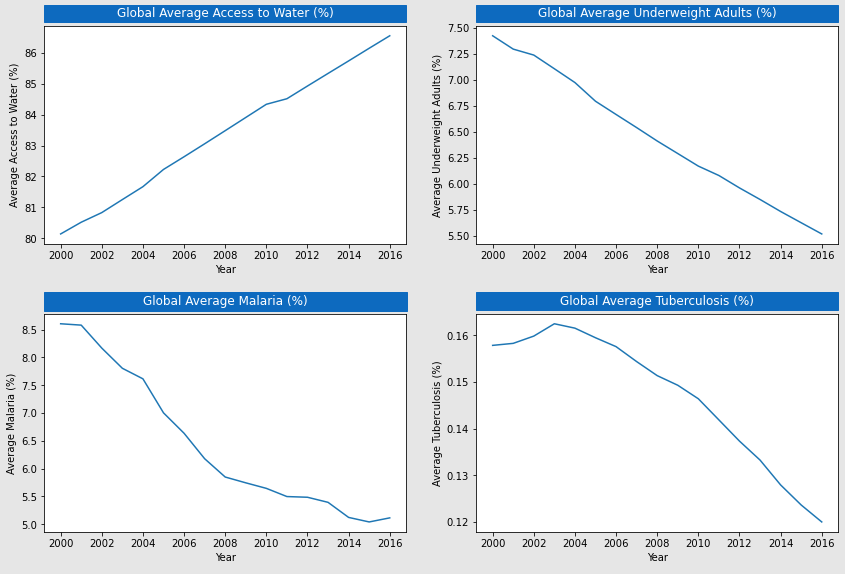

In [252]:
fig = plt.figure(figsize = (12, 8))
fig.set_facecolor("#E6E6E6")
figs = fig.subfigures(2, 2)

ax1 = figs[0][0].subplots(1, 1)
ax2 = figs[0][1].subplots(1, 1)
ax3 = figs[1][0].subplots(1, 1)
ax4 = figs[1][1].subplots(1, 1)

ax1.plot(gblAvg.index, gblAvg["PercentWater"])
ax2.plot(gblAvg.index, gblAvg["PercentUnderweightAdults"])
ax3.plot(gblAvg.index, gblAvg["PercentMalaria"])
ax4.plot(gblAvg.index, gblAvg["PercentTb"])

ax1title = ax1.set_title("Global Average Access to Water (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax1title._bbox_patch._mutation_aspect = 0.03
ax1title.get_bbox_patch().set_boxstyle("square", pad = 6.05)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Access to Water (%)")

ax2title = ax2.set_title("Global Average Underweight Adults (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax2title._bbox_patch._mutation_aspect = 0.03
ax2title.get_bbox_patch().set_boxstyle("square", pad = 5.15)
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Underweight Adults (%)")

ax3title = ax3.set_title("Global Average Malaria (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax3title._bbox_patch._mutation_aspect = 0.03
ax3title.get_bbox_patch().set_boxstyle("square", pad = 8.25)
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Malaria (%)")

ax4title = ax4.set_title("Global Average Tuberculosis (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax4title._bbox_patch._mutation_aspect = 0.03
ax4title.get_bbox_patch().set_boxstyle("square", pad = 7)
ax4.set_xlabel("Year")
ax4.set_ylabel("Average Tuberculosis (%)")

print(type(ax1))

plt.tight_layout(pad = 7)
plt.show()
fig.savefig("../../Presentation Materials/global_averages.svg")